In [ ]:
!pip install opendatasets -q

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/msambare/fer2013")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prasadwijesinghe
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013


100%|██████████| 60.3M/60.3M [00:00<00:00, 1.36GB/s]

In [ ]:
IMG_SIZE = (48, 48)
BATCH_SIZE = 64
SEED = 42

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    "fer2013/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
    label_mode="int",
    shuffle=True,
    seed=SEED
)

test_data = tf.keras.utils.image_dataset_from_directory(
    "fer2013/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
    label_mode="int",
    shuffle=False
)

class_names = train_data.class_names
print(class_names)


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


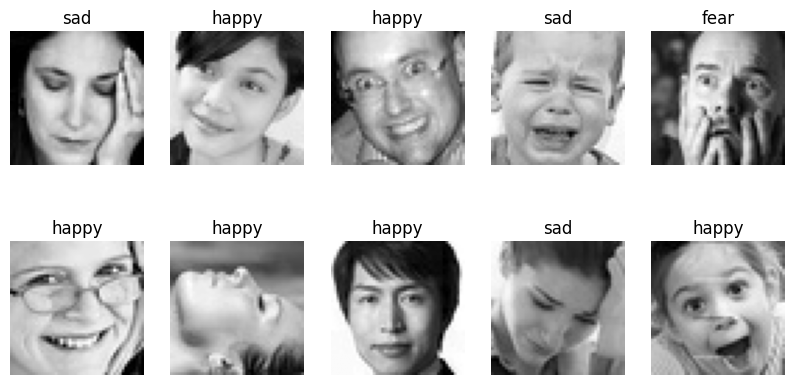

In [ ]:
plt.figure(figsize=(10,5))
for images, labels in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap="gray")
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Rescaling(1./255, input_shape=(48, 48, 1)))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.add(layers.Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))


In [ ]:
model.add(layers.Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))


In [ ]:
model.add(layers.Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))


In [ ]:
model.add(layers.Dropout(0.4))


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(7, activation="softmax"))


In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(48,48,1)),

    layers.Conv2D(32, (3,3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(7, activation="softmax")
])


In [ ]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,423 (2.61 MB)

 Trainable params: 683,975 (2.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
label_mode="int"


In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()


In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=1e-3
)


In [ ]:
model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=["accuracy"]
)


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)


In [ ]:
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=3,
    min_lr=1e-5
)


In [ ]:
history = model.fit(
    train_data,
    epochs=40,
    validation_data=test_data,
    callbacks=[early_stop, lr_reduce]
)


Epoch 1/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.2550 - loss: 1.9960 - val_accuracy: 0.2643 - val_loss: 1.8511 - learning_rate: 0.0010
Epoch 2/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3567 - loss: 1.6092 - val_accuracy: 0.4285 - val_loss: 1.4823 - learning_rate: 0.0010
Epoch 3/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4072 - loss: 1.5032 - val_accuracy: 0.4459 - val_loss: 1.4236 - learning_rate: 0.0010
Epoch 4/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4386 - loss: 1.4308 - val_accuracy: 0.4840 - val_loss: 1.3763 - learning_rate: 0.0010
Epoch 5/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4669 - loss: 1.3715 - val_accuracy: 0.4682 - val_loss: 1.3503 - learning_rate: 0.0010
Epoch 6/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4895 - loss: 1.3120 - val_accuracy: 0.4380 - val_loss: 1.3943 - learning_rate: 0.0010
Epoch 7/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5103 - loss: 1.26

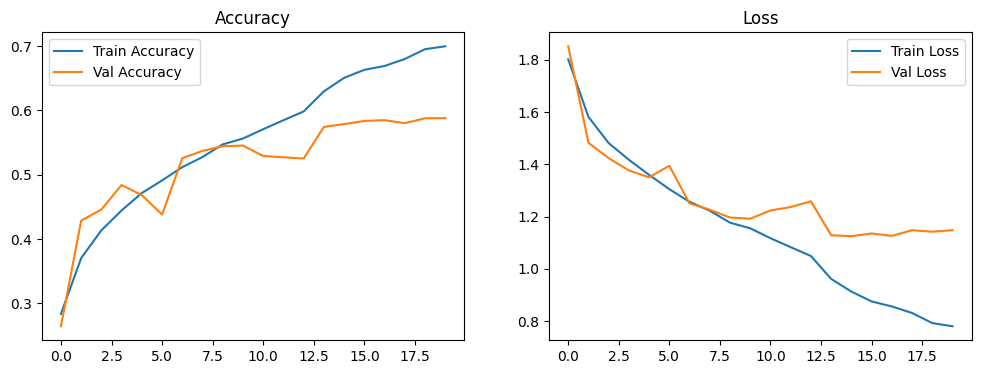

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


EVALUATION

In [ ]:
import numpy as np

y_true = []
y_pred = []

for images, labels in test_data:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    digits=3
))


              precision    recall  f1-score   support

       angry      0.497     0.471     0.483       958
     disgust      0.727     0.216     0.333       111
        fear      0.403     0.298     0.343      1024
       happy      0.821     0.804     0.813      1774
     neutral      0.536     0.536     0.536      1233
         sad      0.404     0.554     0.467      1247
    surprise      0.746     0.717     0.731       831

    accuracy                          0.579      7178
   macro avg      0.591     0.514     0.529      7178
weighted avg      0.587     0.579     0.577      7178



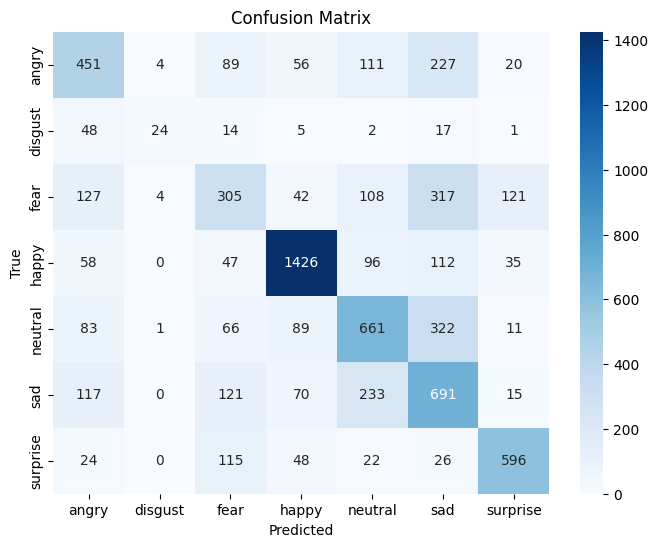

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


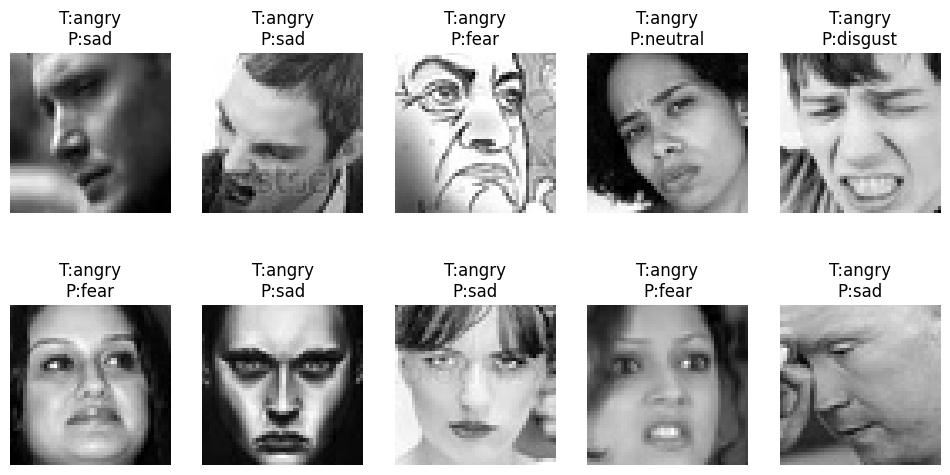

In [ ]:
plt.figure(figsize=(12,6))

count = 0
done_plotting = False
for images, labels in test_data:
    if done_plotting:
        break # Break from outer loop

    preds = model.predict(images, verbose=0)
    for i in range(len(images)):
        if labels[i] != np.argmax(preds[i]):
            plt.subplot(2,5,count+1)
            plt.imshow(images[i].numpy().squeeze(), cmap="gray")
            plt.title(
                f"T:{class_names[labels[i]]}\nP:{class_names[np.argmax(preds[i])]}"
            )
            plt.axis("off")
            count += 1
            if count == 10:
                plt.show()
                done_plotting = True
                break # Break from inner loop

In [ ]:
model.save("emotion_recognition_model.h5")

In [ ]:
model.save("emotion_recognition_model.keras")